In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.grid_search import GridSearchCV
train = pd.read_csv('./LargeTrain.csv')
train['Class'] = [ i - 1 for i in train['Class']]
target = 'Class'
predictors = [x for x in train.columns if x not in target]

/home/luke_ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/luke_ubuntu/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
param_test1 = {'max_depth':[5, 7, 9], 'min_samples_split':[200, 400, 600, 800]}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.01, min_samples_split=500, min_samples_leaf=50, max_depth=8, max_features='sqrt', subsample=0.8, random_state=10), param_grid = param_test1, scoring='accuracy', n_jobs=4, iid=False, cv=3, verbose=3)
gsearch1.fit(train[predictors],train[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  2.2min
[Parallel(n_jobs=4)]: Done  48 out of  48 | elapsed:  5.7min finished


([mean: 0.98353, std: 0.00187, params: {'min_samples_split': 200, 'max_depth': 5},
  mean: 0.98140, std: 0.00180, params: {'min_samples_split': 400, 'max_depth': 5},
  mean: 0.97872, std: 0.00122, params: {'min_samples_split': 600, 'max_depth': 5},
  mean: 0.97903, std: 0.00085, params: {'min_samples_split': 800, 'max_depth': 5},
  mean: 0.98527, std: 0.00221, params: {'min_samples_split': 200, 'max_depth': 7},
  mean: 0.98249, std: 0.00153, params: {'min_samples_split': 400, 'max_depth': 7},
  mean: 0.98055, std: 0.00155, params: {'min_samples_split': 600, 'max_depth': 7},
  mean: 0.97888, std: 0.00122, params: {'min_samples_split': 800, 'max_depth': 7},
  mean: 0.98531, std: 0.00202, params: {'min_samples_split': 200, 'max_depth': 9},
  mean: 0.98337, std: 0.00191, params: {'min_samples_split': 400, 'max_depth': 9},
  mean: 0.98088, std: 0.00104, params: {'min_samples_split': 600, 'max_depth': 9},
  mean: 0.98008, std: 0.00056, params: {'min_samples_split': 800, 'max_depth': 9}],
 {'

In [4]:
param_test2 = {'n_estimators':[100, 120, 140, 160, 180, 200], 'min_samples_leaf':[20, 30, 40, 50, 60, 70] }
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.01, min_samples_split=200, min_samples_leaf=50, max_depth=9, max_features='sqrt', subsample=0.8, random_state=10), param_grid = param_test2, scoring='accuracy', n_jobs=4, iid=False, cv=5, verbose=3)
gsearch2.fit(train[predictors],train[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:  8.5min
[Parallel(n_jobs=4)]: Done 120 tasks      | elapsed: 37.2min
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed: 63.6min finished


([mean: 0.98901, std: 0.00169, params: {'n_estimators': 100, 'min_samples_leaf': 20},
  mean: 0.98994, std: 0.00175, params: {'n_estimators': 120, 'min_samples_leaf': 20},
  mean: 0.99029, std: 0.00201, params: {'n_estimators': 140, 'min_samples_leaf': 20},
  mean: 0.99083, std: 0.00175, params: {'n_estimators': 160, 'min_samples_leaf': 20},
  mean: 0.99129, std: 0.00169, params: {'n_estimators': 180, 'min_samples_leaf': 20},
  mean: 0.99169, std: 0.00154, params: {'n_estimators': 200, 'min_samples_leaf': 20},
  mean: 0.98767, std: 0.00255, params: {'n_estimators': 100, 'min_samples_leaf': 30},
  mean: 0.98901, std: 0.00142, params: {'n_estimators': 120, 'min_samples_leaf': 30},
  mean: 0.98998, std: 0.00158, params: {'n_estimators': 140, 'min_samples_leaf': 30},
  mean: 0.99006, std: 0.00143, params: {'n_estimators': 160, 'min_samples_leaf': 30},
  mean: 0.99080, std: 0.00133, params: {'n_estimators': 180, 'min_samples_leaf': 30},
  mean: 0.99113, std: 0.00119, params: {'n_estimators'

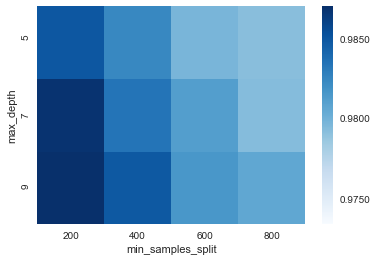

In [9]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
grid_visualization1 = []

for grid_pair in gsearch1.grid_scores_:
    grid_visualization1.append(grid_pair.mean_validation_score)
    
grid_visualization1 = np.array(grid_visualization1)
grid_visualization1.shape = (3, 4)
sb.heatmap(grid_visualization1, cmap='Blues')
plt.xticks(np.arange(4) + 0.5, gsearch1.param_grid['min_samples_split'])
plt.yticks(np.arange(3) + 0.5, gsearch1.param_grid['max_depth'][::-1])
plt.xlabel('min_samples_split')
plt.ylabel('max_depth')

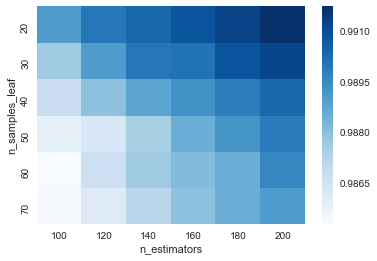

In [8]:
grid_visualization2 = []
for grid_pair in gsearch2.grid_scores_:
    grid_visualization2.append(grid_pair.mean_validation_score)
grid_visualization2 = np.array(grid_visualization2)
grid_visualization2.shape = (6, 6)
sb.heatmap(grid_visualization2, cmap='Blues')
plt.xticks(np.arange(6) + 0.5, gsearch2.param_grid['n_estimators'])
plt.yticks(np.arange(6) + 0.5, gsearch2.param_grid['min_samples_leaf'][::-1])
plt.xlabel('n_estimators')
plt.ylabel('n_samples_leaf')